# Using DBSCAN clustering to coin image

**Import library's**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Load Image**

In [2]:
img = cv2.imread("/Users/neemiasbsilva/Downloads/Computer-Vision-with-Python/DATA/separate_coins.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (256, 256))

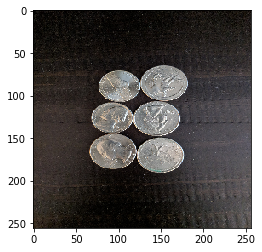

In [3]:
plt.imshow(img)

**Visualizing the 3 channels in 3D plot**

In [4]:
r, g, b = cv2.split(img)
print("\tShape of the Three Chaneels")
print("r: {}\t g: {}, b: {}".format(r.shape, g.shape, b.shape))

	Shape of the Three Chaneels
r: (256, 256)	 g: (256, 256), b: (256, 256)


In [5]:
from mpl_toolkits.mplot3d import Axes3D

def plot(r, g, b):
    fig = plt.figure(figsize=(12,12))
    
    ax = Axes3D(fig)
    ax.scatter(r, g, b)
    plt.show()
    

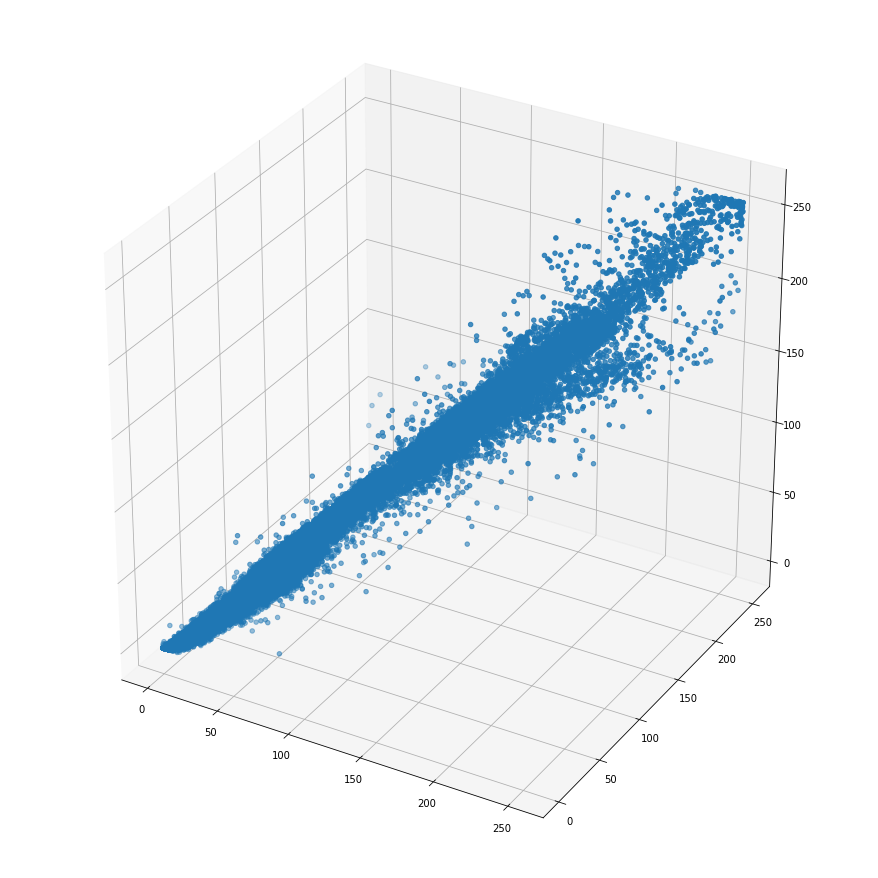

In [6]:
r = r.flatten()
g = g.flatten()
b = b.flatten()

plot(r, g, b)

## Apply DBSCAN Clustering

In [4]:
vectorized = img.reshape((-1, 3))

In [5]:
vectorized.shape

(65536, 3)

In [6]:
 vectorized = np.float32(vectorized)

In [7]:
from sklearn.cluster import DBSCAN

In [210]:
clustering = DBSCAN(eps=4, min_samples=280, metric='euclidean', 
                    metric_params=None, algorithm='auto', 
                    leaf_size=500, p=None, n_jobs=None).fit(vectorized)

In [211]:
clustering.labels_

array([ 0,  0,  0, ...,  0,  0, -1])

In [212]:
core_samples_mask = np.zeros_like(clustering.labels_, dtype=bool)

In [213]:
core_samples_mask[clustering.core_sample_indices_] = True

In [214]:
labels = clustering.labels_

**Number of cluster in labels, ignoring noise if present**

In [215]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

1

In [216]:
n_noise_ = list(labels).count(-1)
n_noise_

10852

In [217]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

In [218]:
len(colors)

2

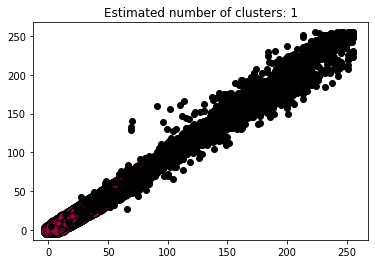

In [219]:
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = vectorized[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = vectorized[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

**Show the image**

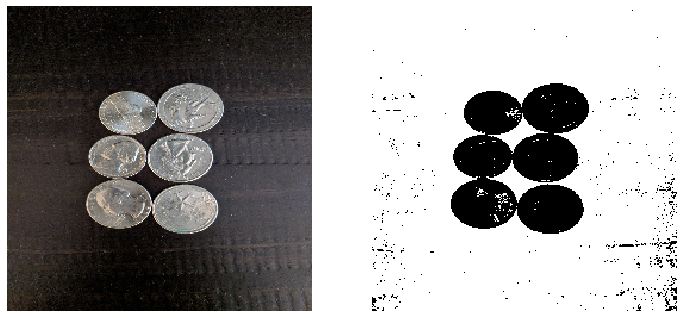

In [220]:
plt.figure(2, figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')
plt.subplot(1, 2, 2)
img_reshape = np.reshape(labels, [256, 256])

plt.imshow(img_reshape, cmap='gray')
plt.axis('off')
plt.show()